In [2]:
%matplotlib inline
### Standard imports
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from importlib import reload
### HEPKIT imports
import hepkit.hepData as hd
import hepkit.hepPlot as hp
import hepkit.hepFormat as hf
### Local imports
from aux import aux
### Settings
hf.DefaultSetup()



def PrintKeys(fileName):
    for k in uproot.open(fileName).allkeys():
        print(k)
        
def OpenRoot(fileName,tree):
    rTree = uproot.open(fileName)[tree]
    df = rTree.pandas.df(['*'],flatten=False,namedecode='utf-8')
    return df

# Special trick for string columns
def decodeList(l):
    return [x.decode(encoding='UTF-8') for x in l]

# Electric field
Axial electric field

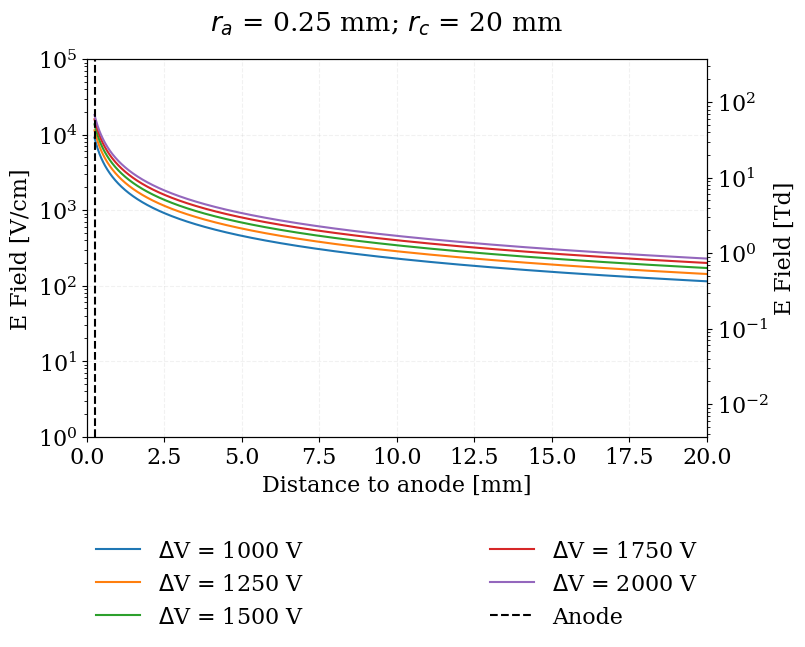

In [3]:
reload(aux)

xs = np.linspace(0.25,20,1000)
vs = np.linspace(1000,2000,5)

plt.figure(figsize=(8,5),facecolor='white',dpi=100)
for v in vs:
    plt.plot(xs,aux.EleField(xs,deltaV=v)*10,label=r'$\Delta$V = '+f'{v:.0f} V')
plt.axvline(0.25,ls='--',color='black',label='Anode')
plt.yscale('log')
plt.ylim(1,1e5)
plt.xlim(0,20)
plt.ylabel('E Field [V/cm]')
plt.xlabel('Distance to anode [mm]')
plt.legend(bbox_to_anchor=(0, -0.25, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.suptitle(r'$r_a$ = 0.25 mm; $r_c$ = 20 mm')

ax1 = plt.gca()
ax2 = ax1.twinx()
plt.ylim(aux.To_Td(1),aux.To_Td(1e5))
plt.yscale('log')
plt.ylabel('E Field [Td]')

plt.savefig('img/efield.pdf',bbox_inches='tight', pad_inches=0.3)
plt.show()

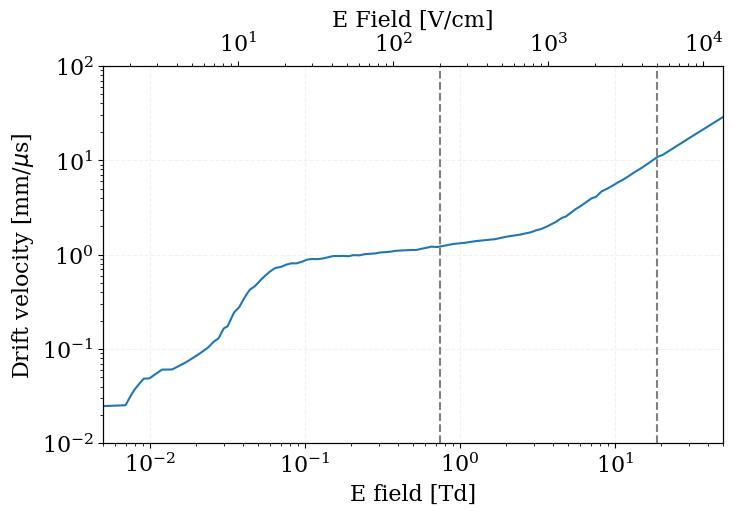

In [4]:
reload(aux)
from scipy.interpolate import interp1d

vel = pd.read_csv('aux/drift.csv')
fVel = interp1d(vel['efield'], vel['drift'], kind='linear', fill_value='extrapolate')

xs = np.logspace(-3,2,1000)
plt.figure(figsize=(8,5),facecolor='white',dpi=100)
plt.plot(xs,fVel(xs)*1e-5)
plt.xlabel('E field [Td]')
plt.ylabel('Drift velocity [mm/$\mu$s]')
plt.xlim(5e-3,5e1)
plt.ylim(1e-2,1e2)
plt.xscale('log')
plt.yscale('log')
plt.grid(ls='--',color='C7',alpha=0.1)

ax1 = plt.gca()
ax2 = ax1.twiny()
plt.xlim(aux.To_Vcm(5e-3),aux.To_Vcm(5e1))
plt.axvline(2e2,ls='--',color='gray')
plt.axvline(5e3,ls='--',color='gray')
plt.xscale('log')
plt.xlabel('E Field [V/cm]')

plt.savefig('img/edrift_vsfield.pdf',bbox_inches='tight', pad_inches=0.3)
plt.show()

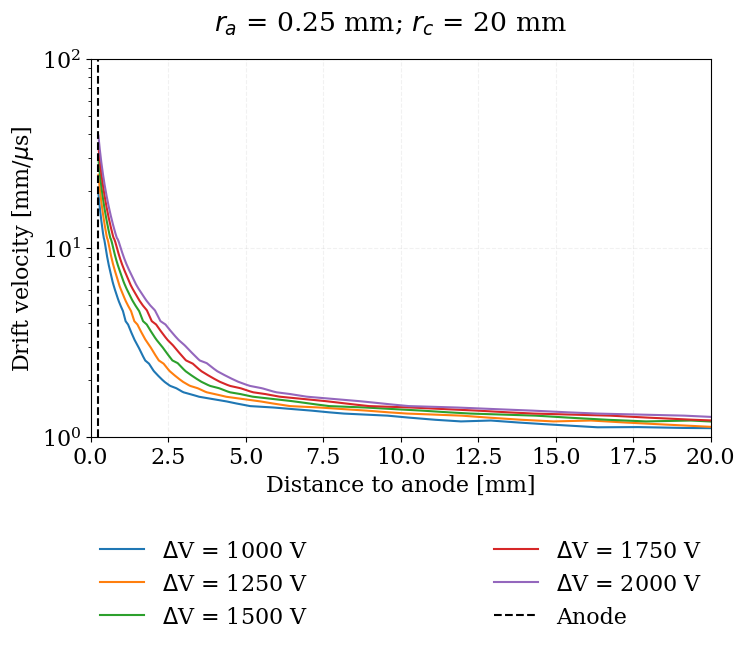

In [5]:
reload(aux)

xs = np.linspace(0.25,20,100000)
vs = np.linspace(1000,2000,5)

plt.figure(figsize=(8,5),facecolor='white',dpi=100)
for v in vs:
    plt.plot(xs,aux.EleDriftVelocity(xs,deltaV=v),label=r'$\Delta$V = '+f'{v:.0f} V')
plt.axvline(0.25,ls='--',color='black',label='Anode')
plt.yscale('log')
plt.ylim(1,1e2)
plt.xlim(0,20)
plt.ylabel(r'Drift velocity [mm/$\mu$s]')
plt.xlabel('Distance to anode [mm]')
plt.legend(bbox_to_anchor=(0, -0.25, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.suptitle(r'$r_a$ = 0.25 mm; $r_c$ = 20 mm')

plt.savefig('img/edrift_vsdistance.pdf',bbox_inches='tight', pad_inches=0.3)
plt.show()

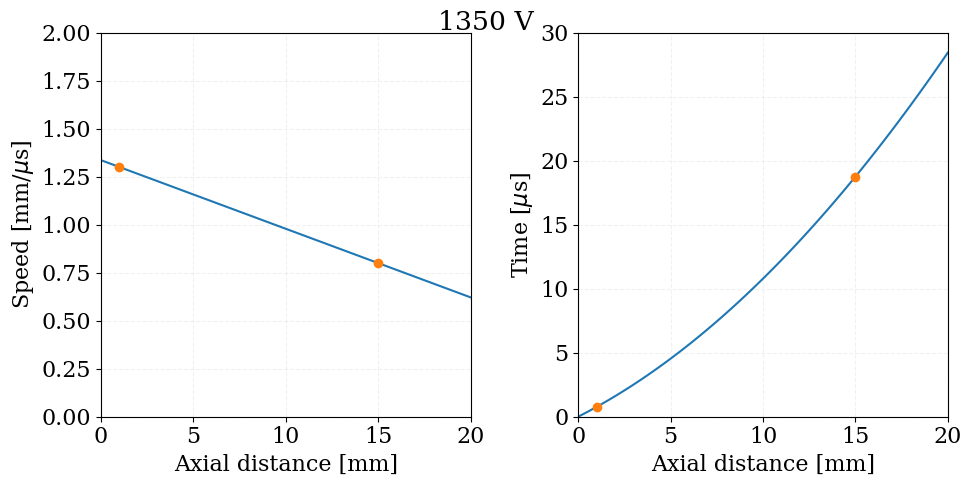

In [6]:
# 1.3 mm/us at 0.1 cm
# 0.8 mm/us at 1.5 cm
speed_xs = [1,15]
speed_ys = [1.3,0.8]

time_xs = [0,1,15]
time_ys = [0,1/1.3,15/0.8]

def eSpeed(dist):
    from scipy import interpolate
    f = interpolate.interp1d(speed_xs, speed_ys, kind='linear', fill_value='extrapolate')
    return f(dist)

def eTime(dist):
    from scipy import interpolate
    f = interpolate.interp1d(time_xs, time_ys, kind='quadratic', fill_value='extrapolate')
    return f(dist)

xrange = np.linspace(0,20,100)
plt.figure(figsize=(10,5),facecolor='white',dpi=100)
plt.subplot(121)
plt.plot(xrange,eSpeed(xrange))
plt.plot(speed_xs,speed_ys,ls='',marker='o')
plt.grid(ls='--',color='C7',alpha=0.1)
plt.xlabel("Axial distance [mm]")
plt.ylabel(r"Speed [mm/$\mu$s]")
plt.xlim(0,20)
plt.ylim(0,2)
plt.subplot(122)
plt.plot(xrange,eTime(xrange))
plt.plot(time_xs[1:],time_ys[1:],ls='',marker='o')
plt.grid(ls='--',color='C7',alpha=0.1)
plt.xlabel("Axial distance [mm]")
plt.ylabel(r"Time [$\mu$s]")
plt.xlim(0,20)
plt.ylim(0,30)
plt.suptitle("1350 V")
plt.tight_layout()
plt.show()

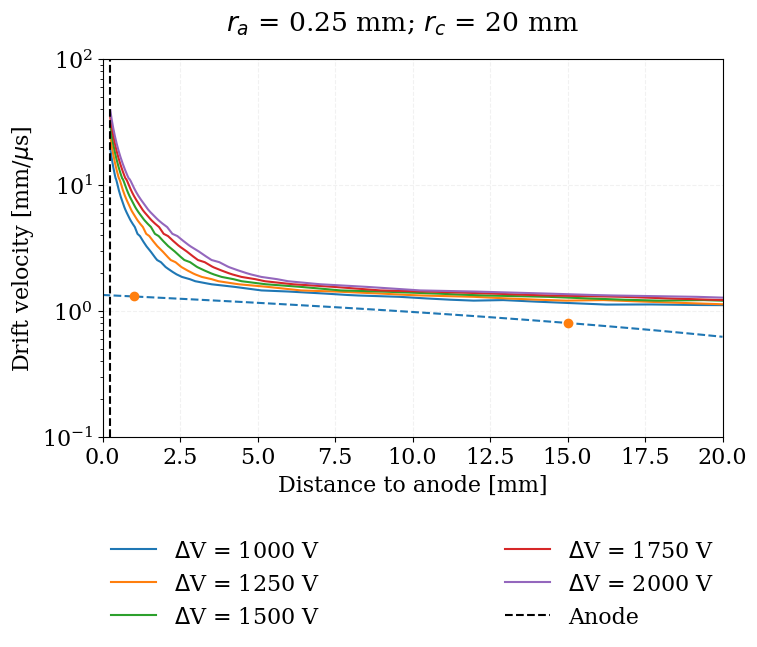

In [7]:
reload(aux)

xs = np.linspace(0.25,20,10000)
vs = np.linspace(1000,2000,5)

plt.figure(figsize=(8,5),facecolor='white',dpi=100)
for v in vs:
    plt.plot(xs,aux.EleDriftVelocity(xs,deltaV=v),label=r'$\Delta$V = '+f'{v:.0f} V')
plt.plot(xrange,eSpeed(xrange),ls='--',color='C0')
plt.plot(speed_xs,speed_ys,ls='',color='C1',marker='o')
plt.axvline(0.25,ls='--',color='black',label='Anode')
plt.yscale('log')
plt.ylim(1e-1,1e2)
plt.xlim(0,20)
plt.ylabel(r'Drift velocity [mm/$\mu$s]')
plt.xlabel('Distance to anode [mm]')
plt.legend(bbox_to_anchor=(0, -0.25, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.suptitle(r'$r_a$ = 0.25 mm; $r_c$ = 20 mm')

plt.savefig('img/edrift_vsdistance.pdf',bbox_inches='tight', pad_inches=0.3)
plt.show()

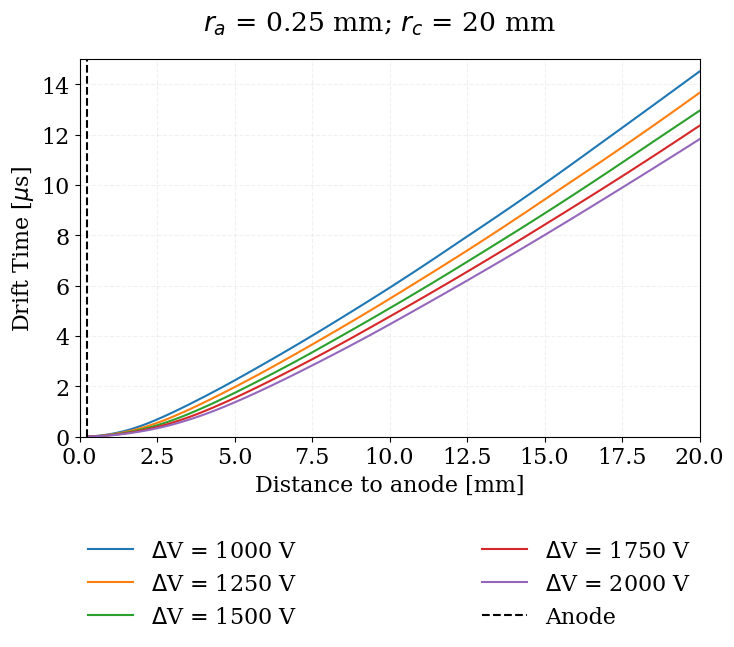

In [8]:
reload(aux)

xs = np.linspace(0.25,20,100)
vs = np.linspace(1000,2000,5)


plt.figure(figsize=(8,5),facecolor='white',dpi=100)
for v in tqdm(vs):
    times = [aux.EleDriftTime(x,deltaV=v) for x in xs]
    plt.plot(xs,times,label=r'$\Delta$V = '+f'{v:.0f} V')
plt.axvline(0.25,ls='--',color='black',label='Anode')
# plt.plot(xrange,eTime(xrange),color='C0',ls='--')
# plt.plot(time_xs[1:],time_ys[1:],ls='',color='C1',marker='o')
# plt.yscale('log')
plt.ylim(0,15)
plt.xlim(0,20)
plt.ylabel(r'Drift Time [$\mu$s]')
plt.xlabel('Distance to anode [mm]')
plt.legend(bbox_to_anchor=(0, -0.25, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0, frameon=False)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.suptitle(r'$r_a$ = 0.25 mm; $r_c$ = 20 mm')

plt.savefig('img/edrift_time_vsdistance.pdf',bbox_inches='tight', pad_inches=0.3)
plt.show()

In [18]:
reload(aux)

xs = np.linspace(0.25,20,100)
vs = np.linspace(1000,2000,11)


for v in tqdm(vs):
    times = [aux.EleDriftTime(x,deltaV=v) for x in xs]
    dfd = {'x': xs, 'y': times}
    df = pd.DataFrame(dfd)
    df.to_csv(f'tables/v{v:.0f}.csv',index=False)